<a href="https://colab.research.google.com/github/matiasErenchun/ML/blob/master/proyectoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://sinca.mma.gob.cl/cgi-bin/APUB-MMA/apub.tsindico2.cgi?outtype=xcl&macro=./RVII/709/Cal/PM25//PM25.horario.horario.ic&from=120707&to=211130&path=/usr/airviro/data/CONAMA/&lang=esp&rsrc=&macropath='
archivo = pd.read_csv(url, delimiter = ';', decimal=",")
archivo

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,Unnamed: 5
0,120707,100,NaN,NaN,NaN,NaN
1,120707,200,NaN,NaN,NaN,NaN
2,120707,300,NaN,NaN,NaN,NaN
3,120707,400,NaN,NaN,NaN,NaN
4,120707,500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
82410,211130,1900,NaN,3.0,NaN,NaN
82411,211130,2000,NaN,7.0,NaN,NaN
82412,211130,2100,NaN,7.0,NaN,NaN
82413,211130,2200,NaN,11.0,NaN,NaN


In [ ]:
def calcular_valor (a,b,c):
  counter = 0
  valor = 0
  if (not np.isnan(a)):
      valor+= a
      counter+=1
  elif (not np.isnan(b)):
      valor+= b
      counter+=1
  elif (not np.isnan(c)):
      valor+= c
      counter+=1
  if(valor == 0):
    return -1
  else:
    return valor/counter

In [102]:
nuevos_datos = {}

for i  in range(len(archivo)):
  algo = archivo.iloc[i]
  dia = algo['FECHA (YYMMDD)']
  registroV = algo['Registros validados']
  registroP= algo['Registros preliminares']
  registroNV= algo['Registros no validados']
  valor= calcular_valor(registroV,registroP,registroNV)
  if(nuevos_datos.get(dia) != None):
    valores= nuevos_datos.get(dia)
    valores.append(valor)
    nuevos_datos.setdefault(dia,valores)
  else:
    valores =[]
    valores.append(valor)
    nuevos_datos.setdefault(dia,valores)
  #if(i>30):
    #break

In [ ]:
def crear_clave(a):
  stra=str(int(a))
  a='20'
  j = a+stra[0]+stra[1]+'-'+stra[2]+stra[3]+'-'+stra[4]+stra[5]
  return j

In [ ]:
promedio_diario = {}
for clave in nuevos_datos:
  valores = nuevos_datos.get(clave)
  counter = 0
  valordiario = 0
  for i in valores:
    if i>=0:
      valordiario+=i
      counter+=1
  if not counter == 0:
    valordiario = valordiario/counter
  else:
    valordiario = -1
  nueva_clave=crear_clave(clave)
  promedio_diario.setdefault(nueva_clave,valordiario)


con todo lo anterior se calcula el promedio diario de las mediciones para cada dia, donde se descartaron los datos faltantes y en caso de no tener datos se reemplazo con un 0

In [ ]:
from datetime import datetime
df = pd.DataFrame(columns=['ds', 'y'])
for clavev in promedio_diario:
  valor = promedio_diario.get(clavev)
  dt_object2 = datetime.strptime(clavev, "%Y-%m-%d")
  df = df.append({'ds': dt_object2, 'y':valor}, ignore_index=True)
df

,ds,y
0,2012-07-07,212.811212
1,2012-07-08,121.817817
2,2012-07-09,36.074992
3,2012-07-10,28.607624
4,2012-07-11,95.962415
...,...,...
3429,2021-11-26,8.750000
3430,2021-11-27,7.000000
3431,2021-11-28,8.333333
3432,2021-11-29,7.875000


In [ ]:
df.describe

<bound method NDFrame.describe of              ds           y
0    2012-07-07  212.811212
1    2012-07-08  121.817817
2    2012-07-09   36.074992
3    2012-07-10   28.607624
4    2012-07-11   95.962415
...         ...         ...
3429 2021-11-26    8.750000
3430 2021-11-27    7.000000
3431 2021-11-28    8.333333
3432 2021-11-29    7.875000
3433 2021-11-30    6.375000

[3434 rows x 2 columns]>

In [ ]:
max_date = df.ds.max() ## accedemos al periodo y obtenemos el máximo valor de la fecha
min_date = df.ds.min() ## acá hacemos lo análogo pero con el mínimo
print("Date range: {} - {}".format(min_date.strftime("%Y.%m.%d"), max_date.strftime("%Y.%m.%d")))
df.shape

Date range: 2012.07.07 - 2021.11.30


(3434, 2)

In [ ]:
import matplotlib.pyplot as plt

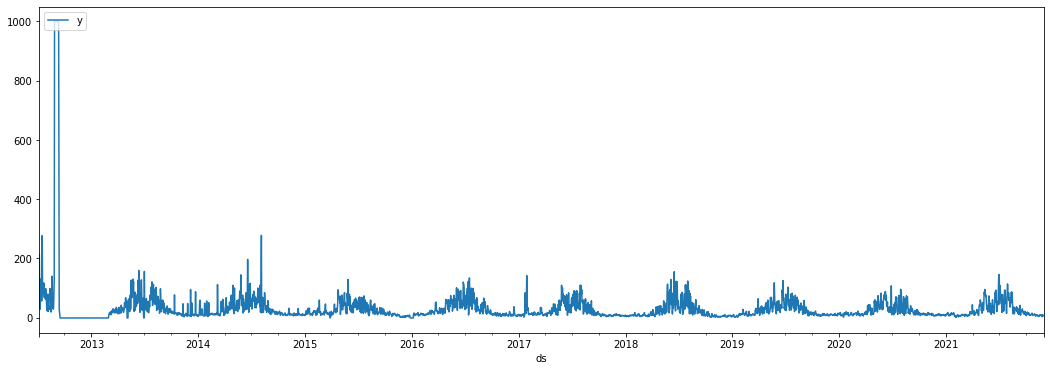

In [ ]:
fig, ax = plt.subplots(figsize=(18,6)) ## ahora comenzamos hacer las visualizaciones tomando los datos y gráficas de los con respecto al tiempo
df.plot(x="ds", y="y", ax=ax)
plt.legend(loc='upper left')

si miramos el grafico anterior, los datos que son anteriores del 2013-03-01 son datos en los cuales se encuentan muchas lagunas y muy grandes, ademas de tener valores extremos que sin una justificacion y contexto claro se alejan bastante de los que seria normal para este caso, por esto se decidio no utilizar esos datos en el entrenamiento del  modelo.

In [ ]:
rare_data = df[df.ds < '2013-03-01']
usefull_data = df[df.ds >= '2013-03-01']
usefull_data.tail

<bound method NDFrame.tail of              ds          y
237  2013-03-01   5.875000
238  2013-03-02  10.250000
239  2013-03-03  15.333333
240  2013-03-04  17.041667
241  2013-03-05  17.125000
...         ...        ...
3429 2021-11-26   8.750000
3430 2021-11-27   7.000000
3431 2021-11-28   8.333333
3432 2021-11-29   7.875000
3433 2021-11-30   6.375000

[3197 rows x 2 columns]>

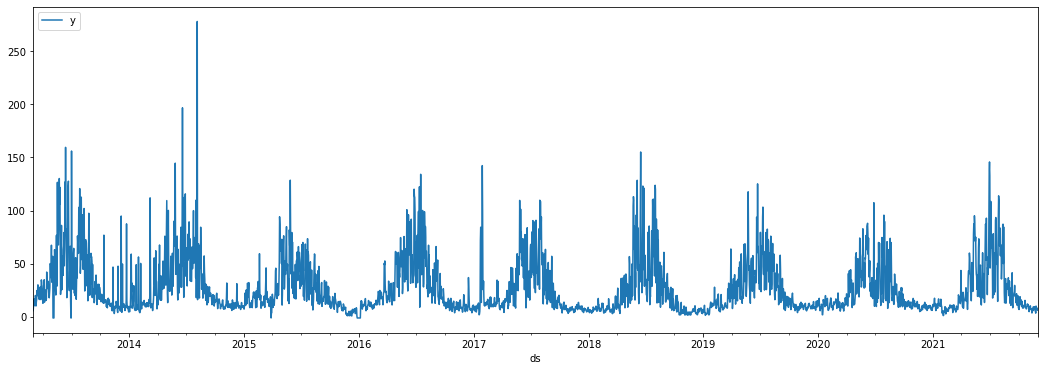

In [ ]:
fig, ax = plt.subplots(figsize=(18,6)) ## ahora comenzamos hacer las visualizaciones tomando los datos y gráficas de los con respecto al tiempo
usefull_data.plot(x="ds", y="y", ax=ax)
plt.legend(loc='upper left')

ahora tenemos los datos desde el 2013-03-01 los datos faltantes  se imputaron con un 0 por temas de simplicidad, aun que podrian aplicarse otras tecnicas segun corresponda, como en el caso de los dias entre el 2015-12-25 al 2016-01-07.

In [ ]:
#separamos los datos en dataset de entrenmaiento y dataset de pruebas, de manera arbitraria se tomo que todos los dias anteriores al 2019-01-01
#son para el conjuntod e entrenamiento y desde el 2019-01-01 en adelante serviran como conjunto de validacion.
train_data_set = usefull_data[usefull_data.ds < '2019-01-01']
test_data_set = usefull_data[usefull_data.ds >= '2019-01-01']
train_data_set

,ds,y
237,2013-03-01,5.875000
238,2013-03-02,10.250000
239,2013-03-03,15.333333
240,2013-03-04,17.041667
241,2013-03-05,17.125000
...,...,...
2364,2018-12-27,3.666667
2365,2018-12-28,5.083333
2366,2018-12-29,3.250000
2367,2018-12-30,3.125000


In [ ]:
!pip install Prophet

In [ ]:
from prophet import Prophet
#creamos el modelo de Prophet y lo entrenamos con el metodo fit.
model = Prophet(
  daily_seasonality=True
  )
model.fit(train_data_set)

In [ ]:

forecast = model.predict(test_data_set[['ds']])

yhat_test = forecast.yhat.values

en esta parte predecimo los valores para el dataset de pruebas y los obtenemos para geaficarlos  mas tarde.

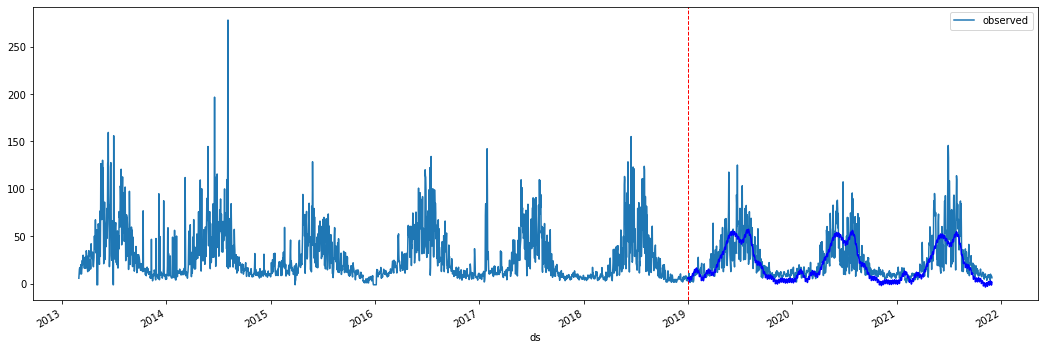

In [ ]:
fig, ax = plt.subplots(figsize=(18,6))

plt.axvline(pd.to_datetime(str(test_data_set.ds.values[0])), c='red', ls='--', lw=1)
usefull_data.plot(x="ds", y="y", ax=ax, label="observed")

ax.plot(pd.to_datetime(test_data_set.ds.values), yhat_test,
        color="blue", label="predicted")


se puede apreciar que lo predicho se acota a la forma genral de la curva, pero no al detalle de los picos o crestas que se pueden generar en los datos reales.
